# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [264]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys_test_ import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)




## Generate Cities List

In [265]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lon = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lat, lon)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

In [266]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url=f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [267]:
temp=[]
lats=[]
lngs=[]
humid=[]
cloud=[]
wind=[]
name=[]
date =[]
country=[]

record_count = 1
set_count = 1


for city in cities:
    try:
        response = requests.get(query_url+city)
        if record_count < 50:
            print(f"Processing Record {record_count} of set {set_count} | {city}")
            record_count=record_count +1 
        else:
            set_count=set_count+1
            record_count=0
          
        
        print(response.url)
       
        
        
        resp_json=response.json()
        temp.append(resp_json["main"]["temp"])
        lats.append(resp_json["coord"]["lat"])
        humid.append(resp_json["main"]["humidity"])
        cloud.append(resp_json["clouds"]["all"])
        wind.append(resp_json["wind"]["speed"])
        name.append(resp_json["name"])
        cid.append(resp_json["id"])
        date.append(resp_json["dt"])
        lngs.append(resp_json["coord"]["lon"])
        country.append(resp_json["sys"]["country"])
    
    except KeyError:
        print("city not found")

Processing Record 1 of set 1 | grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=grand%20gaube
Processing Record 2 of set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=port%20alfred
Processing Record 3 of set 1 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=georgetown
Processing Record 4 of set 1 | forio
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=forio
Processing Record 5 of set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=rikitea
Processing Record 6 of set 1 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=paamiut
Processing Record 7 of set 1 | kuala terengganu
http://api.openweathermap.org/

Processing Record 3 of set 2 | hualmay
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=hualmay
Processing Record 4 of set 2 | alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=alta%20floresta
Processing Record 5 of set 2 | namibe
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=namibe
Processing Record 6 of set 2 | ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=ornskoldsvik
Processing Record 7 of set 2 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=kavieng
Processing Record 8 of set 2 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=pevek
Processing Record 9 of set 2 | norman wells
http://api.openweathermap.org/data/2.5

Processing Record 5 of set 3 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=lavrentiya
Processing Record 6 of set 3 | samusu
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=samusu
city not found
Processing Record 7 of set 3 | longlac
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=longlac
city not found
Processing Record 8 of set 3 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=barrow
Processing Record 9 of set 3 | garwolin
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=garwolin
Processing Record 10 of set 3 | lagoa
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=lagoa
Processing Record 11 of set 3 | bahia blanca
http://api.openweatherma

Processing Record 7 of set 4 | champerico
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=champerico
Processing Record 8 of set 4 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=illoqqortoormiut
city not found
Processing Record 9 of set 4 | vao
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=vao
Processing Record 10 of set 4 | nago
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=nago
Processing Record 11 of set 4 | cayenne
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=cayenne
Processing Record 12 of set 4 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=laguna
Processing Record 13 of set 4 | grenfell
http://api.openweathermap.org/dat

Processing Record 10 of set 5 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=victoria
Processing Record 11 of set 5 | tuy hoa
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=tuy%20hoa
Processing Record 12 of set 5 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=coihaique
Processing Record 13 of set 5 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=cape%20town
Processing Record 14 of set 5 | bonfim
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=bonfim
Processing Record 15 of set 5 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=alofi
Processing Record 16 of set 5 | nawabganj
http://api.openweathermap.org/data/2.5/weath

Processing Record 12 of set 6 | churapcha
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=churapcha
Processing Record 13 of set 6 | herat
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=herat
Processing Record 14 of set 6 | college
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=college
Processing Record 15 of set 6 | hunza
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=hunza
city not found
Processing Record 16 of set 6 | eydhafushi
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=eydhafushi
Processing Record 17 of set 6 | yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=yar-sale
Processing Record 18 of set 6 | lorengau
http://api.openweathermap.org/data

Processing Record 15 of set 7 | chabahar
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=chabahar
Processing Record 16 of set 7 | vagay
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=vagay
Processing Record 17 of set 7 | bose
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=bose
Processing Record 18 of set 7 | santa fe
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=santa%20fe
Processing Record 19 of set 7 | lashio
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=lashio
Processing Record 20 of set 7 | kindu
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=kindu
Processing Record 21 of set 7 | si sa ket
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a0

Processing Record 18 of set 8 | mehamn
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=mehamn
Processing Record 19 of set 8 | lakes entrance
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=lakes%20entrance
Processing Record 20 of set 8 | aberdeen
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=aberdeen
Processing Record 21 of set 8 | smithers
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=smithers
Processing Record 22 of set 8 | whitianga
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=whitianga
Processing Record 23 of set 8 | matola
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=matola
Processing Record 24 of set 8 | gazojak
http://api.openweathermap.org/data

Processing Record 20 of set 9 | senhor do bonfim
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=senhor%20do%20bonfim
Processing Record 21 of set 9 | broken hill
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=broken%20hill
Processing Record 22 of set 9 | esna
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=esna
Processing Record 23 of set 9 | poum
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=poum
Processing Record 24 of set 9 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=luderitz
Processing Record 25 of set 9 | ratangarh
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=ratangarh
Processing Record 26 of set 9 | tuktoyaktuk
http://api.openweatherma

Processing Record 23 of set 10 | namatanai
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=namatanai
Processing Record 24 of set 10 | harper
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=harper
Processing Record 25 of set 10 | baculin
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=baculin
Processing Record 26 of set 10 | qarchi gak
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=qarchi%20gak
Processing Record 27 of set 10 | batticaloa
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=batticaloa
Processing Record 28 of set 10 | talcahuano
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=talcahuano
Processing Record 29 of set 10 | road town
http://api.openweatherm

Processing Record 26 of set 11 | lixourion
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=lixourion
Processing Record 27 of set 11 | caravelas
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=caravelas
Processing Record 28 of set 11 | chagda
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=chagda
city not found
Processing Record 29 of set 11 | belyy
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=belyy
Processing Record 30 of set 11 | glenwood springs
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=glenwood%20springs
Processing Record 31 of set 11 | padron
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=padron
Processing Record 32 of set 11 | seydi
http://api.ope

Processing Record 29 of set 12 | embu
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=embu
Processing Record 30 of set 12 | say
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=say
Processing Record 31 of set 12 | benghazi
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=benghazi
Processing Record 32 of set 12 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=pacific%20grove
Processing Record 33 of set 12 | primero de enero
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=primero%20de%20enero
Processing Record 34 of set 12 | west wendover
http://api.openweathermap.org/data/2.5/weather?appid=368e9a7a091a9669b7b516bfb07fb056&units=imperial&q=west%20wendover
Processing Record 35 of set 12 | fortuna
http://ap

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [276]:
weather_dict = {"city": name,"cloudiness":cloud,"country":country,"date":date,"humidity":humid,"Lat":lats, "Lng":lngs,"Max_Temp":temp,"Wind_Speed":wind}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,cloudiness,country,date,humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Grand Gaube,75,MU,1555816444,83,-20.01,57.66,78.91,16.11
1,Port Alfred,94,ZA,1555816074,85,-33.59,26.89,59.00,4.00
2,Georgetown,40,GY,1555812000,88,6.80,-58.16,77.00,4.70
3,Forio,0,IT,1555816548,44,40.73,13.86,60.98,5.82
4,Rikitea,2,PF,1555816633,79,-23.12,-134.97,78.71,10.87
5,Paamiut,100,GL,1555816633,84,61.99,-49.67,30.56,22.66
6,Kuala Terengganu,75,MY,1555812000,83,5.33,103.14,84.07,3.36
7,Saskylakh,100,RU,1555816634,96,71.97,114.09,13.64,8.41
8,Todos Santos,20,MX,1555816616,41,23.45,-110.23,72.28,5.82
9,Jamestown,75,AU,1555816347,49,-33.21,138.60,66.72,10.89


In [277]:
weather_data.to_csv(r'output_data_file') 

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

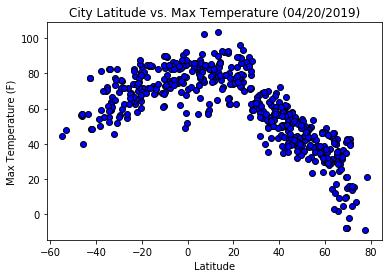

In [278]:
plt.scatter(lats, temp, marker="o", facecolors="blue", edgecolors="black", label="Temp(F)vs.Latitude")
todaysdate = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Max Temperature ({todaysdate})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/LatvsTemp.png")

#### Latitude vs. Humidity Plot

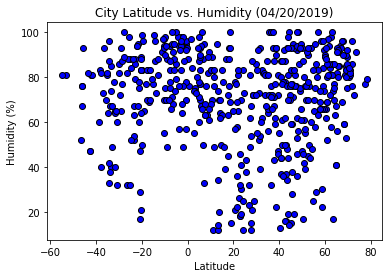

In [279]:
plt.scatter(lats, humid, marker="o", facecolors="blue", edgecolors="black")
todaysdate = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Humidity ({todaysdate})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/LatvsHumid.png")

#### Latitude vs. Cloudiness Plot

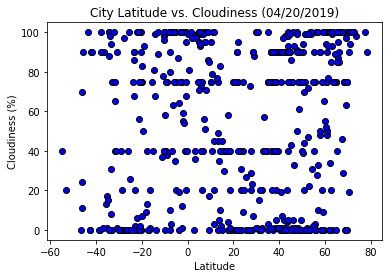

In [280]:
plt.scatter(lats, cloud, marker="o", facecolors="blue", edgecolors="black")
todaysdate = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Cloudiness ({todaysdate})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/LatvsCloud.png")

#### Latitude vs. Wind Speed Plot

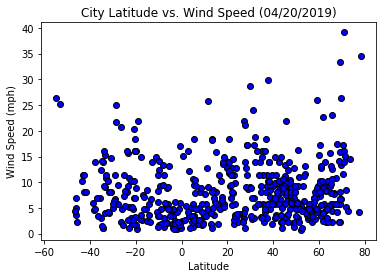

In [281]:
plt.scatter(lats, wind, marker="o", facecolors="blue", edgecolors="black")
todaysdate = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Wind Speed ({todaysdate})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/LatvsWindSpeed.png")